In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from functools import partial

In [2]:
# not related
cm = 1
us = 1
sec = 1E6 * us
um = 1e-4 * cm
mm = 0.1 * cm
l_max = 30 * cm
long_diff = 6 *cm*cm/sec
v_drift = 0.16 * cm/us # cm/us
sigma_l = np.sqrt(long_diff * l_max/v_drift * 2)
pitch_size = 4.4 * mm

In [3]:
# not related
sigma_l # cm --> the value ~ 1/10 pitch size

0.047434164902525694

In [4]:
x = np.arange(-5, 5, 0.1)
diff = np.exp(-x**2/2/0.1**2)/np.sqrt(2*np.pi*0.1**2)

def gaus(x):
    return np.exp(-x**2/2/0.1**2)/np.sqrt(2*np.pi*0.1**2)

In [5]:
res = np.arange(0, 3.09, 0.1)**3/(3**4/4)

In [6]:
def find_res(x):
    k = round((x-0)//0.1)
    if k < len(res) and k >= 0:
        return res[k]
    return 0

def interpolate_res(x, x0, x1):
    u = (x-x0)/(x1-x0)
    y0 = find_res(x0)
    y1 = find_res(x1)
    return y0*(1-u) + y1*u

In [7]:
def gaus_quad_2point_f(d, m, f):
    '''d=(b-a)/2
    m = (b+a)/2
    '''
    xi0 = -0.57735
    xi1 = 0.57735
    x0 = xi0 * d + m
    x1 = xi1 * d + m
    return np.array([f(x0), f(x1)])

def gaus_quad_2point_w():
    return np.array([1, 1])

In [8]:
def conv1d(x, q=gaus, r=interpolate_res, xmin=-10, xmax=10):
    '''
    q and r are functions
    q takes x as argument
    r takes x and the boundary of interval containing it as the interval
    '''
    step = 0.1
    nstep = round((xmax-xmin)/step)-1
    integral = 0
    for i in range(nstep):
        x0 = xmin + i * step
        x1 = xmin + (i+1) * step
        d = step/2
        m = (x0+x1)/2
        inter_res = partial(interpolate_res, x0=x0, x1=x1)
        d0 = ((x - x1) - (x - x0))/2.
        m0 = ((x - x1) + (x - x0))/2.
        d1 = d
        m1 = m
        f0 = gaus_quad_2point_f(d0, m0, gaus)
        f1 = gaus_quad_2point_f(d1, m1, inter_res)
        w = gaus_quad_2point_w()
        integral += np.sum(w*f0*f1)*step/2
    return integral
        

In [9]:
conv1d(2)

0.3777000872492475

In [10]:
v_conv1d = np.vectorize(conv1d)

In [11]:
xval = np.arange(-1, 10, 0.01)
yval = v_conv1d(xval)

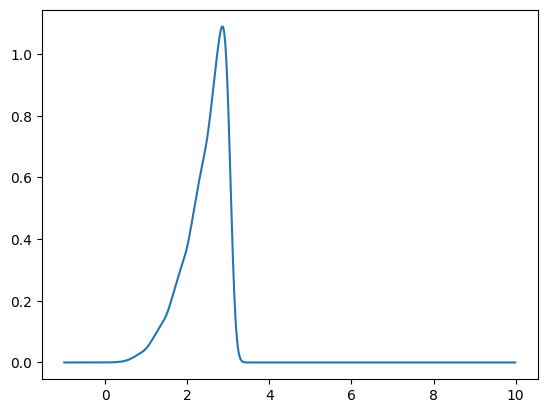

In [12]:
plt.plot(xval, yval)

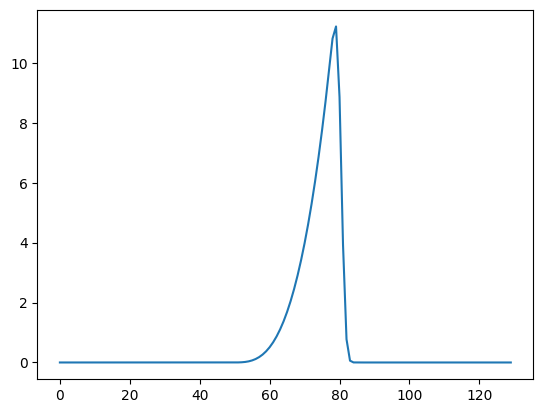

In [13]:
yconv = np.convolve(diff, res)
plt.plot(yconv)

In [14]:
# mathematica
with open('convolve_gaus_x3.json') as f:
    ana = json.load(f)
    ana = np.array(ana)
    xana = np.linspace(-1, 9, ana.shape[0])

NameError: name 'json' is not defined

In [ ]:
plt.plot(xana, ana, label='analytic; gaus * x3')
plt.plot(xval, yval, label='gaus-quad, 2points')
plt.legend()